In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE

In [2]:
from keras.datasets import mnist

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
from keras.models import Sequential

In [11]:
from keras.layers import Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D

In [13]:
from tensorflow import keras

In [31]:
x_train=np.reshape(x_train,(len(x_train),28,28,1))

In [32]:
y_train=x_train.copy()

In [40]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
Stacked_encoder=Sequential([
    keras.layers.Flatten(input_shape=[28,28,1]),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(30,activation="relu"),
])
Stacked_decoder=Sequential([
    keras.layers.Dense(100,activation="relu",input_shape=[30]),
    keras.layers.Dense(28*28,activation="sigmoid"),
    keras.layers.Reshape([28,28,1])
])
stacked_ae=keras.models.Sequential([Stacked_encoder,Stacked_decoder])
stacked_ae.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])

In [35]:
history=stacked_ae.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0272 - accuracy: 0.8064 - val_loss: 27.0095 - val_accuracy: 0.0997
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0138 - accuracy: 0.8129 - val_loss: 27.0415 - val_accuracy: 0.0997
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0120 - accuracy: 0.8135 - val_loss: 27.0635 - val_accuracy: 0.0997
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0111 - accuracy: 0.8137 - val_loss: 27.0691 - val_accuracy: 0.0997
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0104 - accuracy: 0.8139 - val_loss: 27.0535 - val_accuracy: 0.0997
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0098 - accuracy: 0.8141 - val_loss: 27.0734 - val_accuracy: 0.0997
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0094 - accuracy: 0.8142 - val_loss: 27.0697

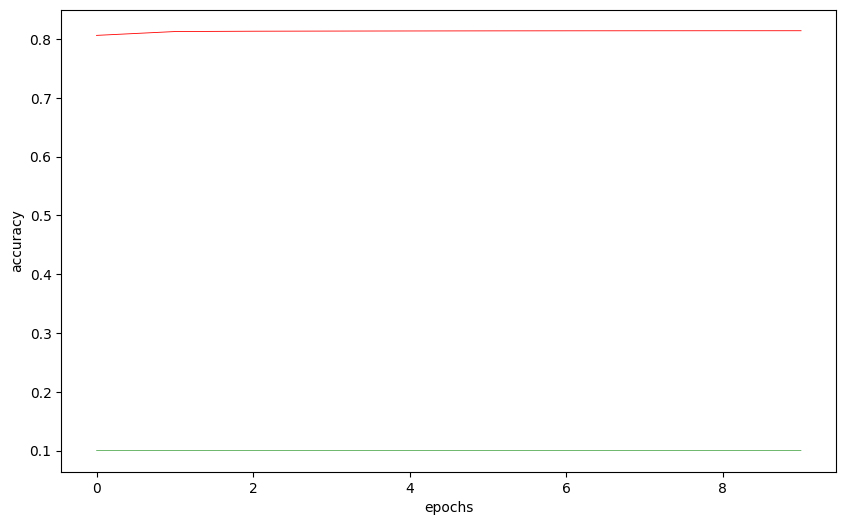

In [39]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"],"r",linewidth=0.6)
plt.plot(history.history["val_accuracy"],"g",linewidth=0.4)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [42]:
from keras.layers import Input

In [ ]:
#deep auto encoder

In [96]:
from keras.layers.core import Reshape

In [136]:
#deep autoencoder
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [137]:
y_train.shape

(60000,)

In [140]:
y_train=x_train.copy()

In [126]:
input_img= Input(shape=(784,))

In [144]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)


In [145]:
from keras.models import Model

In [146]:
model=Model(inputs=input_img,outputs=decoded)

In [147]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")

In [148]:
model.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
235/235 [==============================] - 6s 19ms/step - loss: 0.2476 - accuracy: 0.0115 - val_loss: 0.1635 - val_accuracy: 0.0122
Epoch 2/10
235/235 [==============================] - 6s 23ms/step - loss: 0.1491 - accuracy: 0.0126 - val_loss: 0.1352 - val_accuracy: 0.0103
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1291 - accuracy: 0.0100 - val_loss: 0.1202 - val_accuracy: 0.0103
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1179 - accuracy: 0.0102 - val_loss: 0.1129 - val_accuracy: 0.0113
Epoch 5/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1122 - accuracy: 0.0108 - val_loss: 0.1089 - val_accuracy: 0.0107
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1090 - accuracy: 0.0114 - val_loss: 0.1066 - val_accuracy: 0.0119
Epoch 7/10
235/235 [==============================] - 6s 24ms/step - loss: 0.1068 - accuracy: 0.0115 - val_loss: 0.1044 - val_accuracy: 0.0124

In [149]:
#CNN encoder
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [150]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [154]:
x_train=x_train/255.0
x_test=x_test/255.0

In [155]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [156]:
x_train.shape

(60000, 28, 28)

In [159]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)

In [166]:
input_img=Input(shape=(28,28,1))


In [168]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,MaxPool2D

In [169]:
l1=Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(input_img)
l2=Conv2D(16,kernel_size=(3,3),activation="relu",padding="same")(l1)
l3=MaxPool2D(pool_size=(2,2))(l2)
l4=Dropout(0.2)(l3)
l5=Flatten()(l4)
l6=Dense(120,activation="relu")(l5)
l7=Dense(10,activation="softmax")(l6)

In [170]:
from keras.models import Model

In [171]:
model=Model(inputs=input_img,outputs=l7)

In [172]:
model.compile(optimizer=keras.optimizers.Adadelta(),
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

In [173]:
model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
 44/120 [==========>...................] - ETA: 1:17 - loss: 2.3039 - accuracy: 0.0870

KeyboardInterrupt: ignored